In [15]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, DateTime, ForeignKey
from datetime import datetime, time, tzinfo, timedelta
from sqlalchemy.orm import sessionmaker


In [16]:
engine = create_engine("sqlite:///databases/hawaii.sqlite", echo=False)

In [17]:
session = Session(bind=engine)

In [18]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [19]:
Base = automap_base()
Base.prepare(engine, reflect=True)
measure = Base.classes.measurements
stat = Base.classes.stations
#Measurements = Base.classes.Measurements

In [20]:
Base.classes.keys()

['measurements', 'stations']

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [22]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [23]:
Session = sessionmaker(bind=engine)
Session = sessionmaker()
session = Session(bind=engine)

In [24]:
#Precip Analysis
#read sqlite db
results = session.query(measure.date, measure.prcp).\
    order_by(measure.date.desc()).all()
results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-

In [25]:
#Precip Analysis
#groupby date and sum prcp
precipyear = session.query(measure.date, func.sum(measure.prcp)).\
    order_by(measure.date.desc()).group_by(measure.date).all()
precipyear


[('2017-08-23', 0.53),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.5800000000000001),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.19),
 ('2017-08-16', 0.61),
 ('2017-08-15', 0.8200000000000001),
 ('2017-08-14', 0.31),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.44000000000000006),
 ('2017-08-07', 0.05),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.06),
 ('2017-08-04', 0.06),
 ('2017-08-03', 0.06999999999999999),
 ('2017-08-02', 0.3),
 ('2017-08-01', 0.13999999999999999),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.61),
 ('2017-07-28', 0.77),
 ('2017-07-27', 0.01),
 ('2017-07-26', 0.5),
 ('2017-07-25', 0.61),
 ('2017-07-24', 3.2699999999999996),
 ('2017-07-23', 1.1300000000000001),
 ('2017-07-22', 4.42),
 ('2017-07-21', 0.13),
 ('2017-07-20', 1.24),
 ('2017-07-19', 0.41000000000000003),
 ('2017-07-18', 2.53),
 ('2017-07-17', 0.91),
 ('2017-07-16', 0.

In [26]:
#Precip Analysis
df = pd.DataFrame(precipyear[:365], columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df

,prcp
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09
2017-08-18,0.06
2017-08-17,0.19
2017-08-16,0.61
2017-08-15,0.82


In [27]:
M = pd.read_sql_query('select * from Measurements', engine)
M.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65
1,2,USC00519397,2010-01-02,0.00,63
2,3,USC00519397,2010-01-03,0.00,74
3,4,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


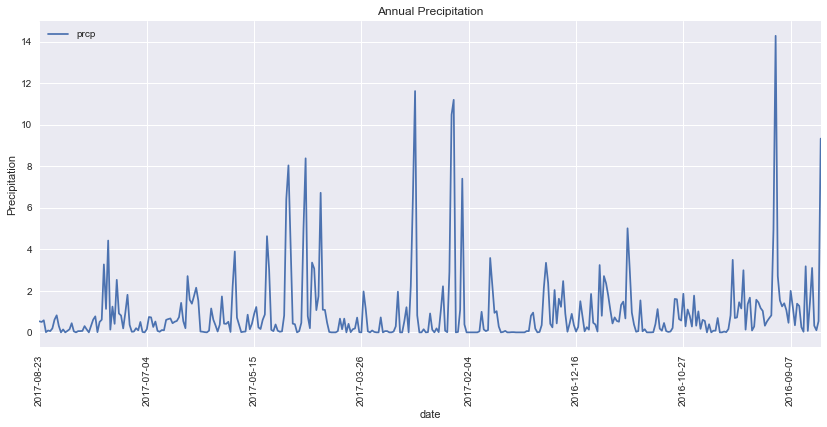

In [28]:
import matplotlib.dates as mdates
precip_plot = df.plot(kind="line", figsize=(14,6), rot=90)
plt.title("Annual Precipitation")
plt.ylabel("Precipitation")
plt.show()

In [29]:
S = pd.read_sql_query('select * from Stations', engine)
S.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [30]:
#Temperature Analysis  calculate total number of stations most active stations: stations and obs counts
#https://stackoverflow.com/questions/17223174/returning-distinct-rows-in-sqlalchemy-with-sqlite
from sqlalchemy import distinct
UniqStations = session.query(measure).distinct(measure.station).group_by(measure.station).count()
print(UniqStations)

9


In [31]:
#Temperature Analysis   most active stations: stations and obs counts
AscStations = session.query(measure.station, func.count(measure.tobs)).\
    group_by(measure.station).all()
AscStations



[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [32]:
#Temperature Analysis   most active stations: stations and obs counts
tobscount = func.count(measure.tobs)
DescStations = session.query(measure.station, func.count(measure.station)).\
    order_by(tobscount.desc()).group_by(measure.station).all()
DescStations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [33]:
#Temperature Analysis   most active station
tobsmax = func.max(measure.tobs)
# Find the number of players from the USA
#usa = session.query(BaseballPlayer).\
#   filter(BaseballPlayer.birth_country == 'USA').count()
#print(f"There are {usa} players from the USA")
MostActive = session.query(measure).\
    filter(measure.station == tobsmax)
MostActive

In [34]:
obsresults = session.query(measure.date, measure.tobs).\
    filter(measure.station == "USC00519281").all()
    
obsresults

[('2010-01-01', 70),
 ('2010-01-02', 62),
 ('2010-01-03', 74),
 ('2010-01-04', 75),
 ('2010-01-05', 74),
 ('2010-01-06', 76),
 ('2010-01-07', 69),
 ('2010-01-08', 66),
 ('2010-01-09', 70),
 ('2010-01-10', 75),
 ('2010-01-11', 64),
 ('2010-01-12', 60),
 ('2010-01-13', 61),
 ('2010-01-14', 68),
 ('2010-01-15', 64),
 ('2010-01-16', 66),
 ('2010-01-17', 67),
 ('2010-01-18', 70),
 ('2010-01-19', 67),
 ('2010-01-20', 67),
 ('2010-01-21', 69),
 ('2010-01-22', 60),
 ('2010-01-23', 75),
 ('2010-01-24', 75),
 ('2010-01-25', 65),
 ('2010-01-26', 75),
 ('2010-01-27', 69),
 ('2010-01-28', 67),
 ('2010-01-29', 66),
 ('2010-01-30', 69),
 ('2010-01-31', 72),
 ('2010-02-01', 67),
 ('2010-02-02', 65),
 ('2010-02-03', 64),
 ('2010-02-04', 67),
 ('2010-02-05', 67),
 ('2010-02-06', 68),
 ('2010-02-07', 69),
 ('2010-02-08', 66),
 ('2010-02-09', 69),
 ('2010-02-10', 61),
 ('2010-02-11', 71),
 ('2010-02-12', 70),
 ('2010-02-13', 70),
 ('2010-02-14', 66),
 ('2010-02-15', 71),
 ('2010-02-16', 61),
 ('2010-02-17

In [35]:
odf = pd.DataFrame(obsresults[:365], columns=['date', 'tobs'])
odf.set_index('date', inplace=True, )
odf.head()

,tobs
date,
2010-01-01,70
2010-01-02,62
2010-01-03,74
2010-01-04,75
2010-01-05,74


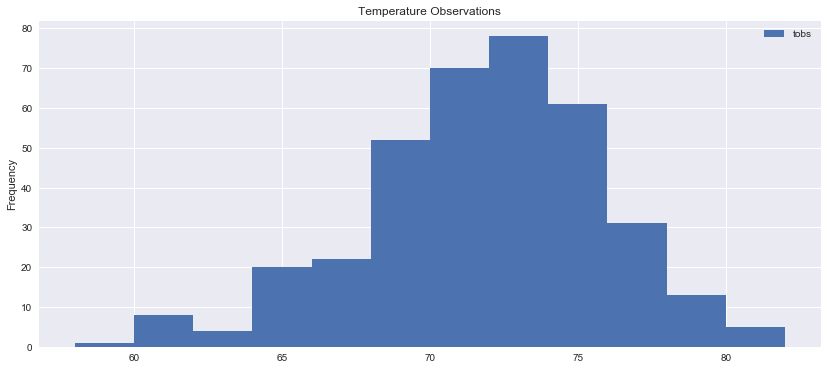

In [36]:
obs_plot = odf.plot(kind="hist", figsize=(14,6), bins=12)
plt.title("Temperature Observations")
plt.ylabel("Frequency")
plt.show()

In [37]:
#Lets make sure I can read sql query into a df. yes. still can
calc_temps = pd.read_sql_query('select * from measurements', engine)
calc_temps.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65
1,2,USC00519397,2010-01-02,0.00,63
2,3,USC00519397,2010-01-03,0.00,74
3,4,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


In [38]:
tobsavg = func.avg(measure.tobs)
tobsmin = func.min(measure.tobs)
tobsmax= func.max(measure.tobs)
startdate = measure.date == "2016-07-01"
enddate = measure.date == "2016-07-10"

In [39]:
results = session.query(measure.date, measure.tobs).\
    filter(measure.date >='2017-07-01').\
    filter(measure.date <='2017-07-10').all()
results

[('2017-07-01', 80),
 ('2017-07-02', 80),
 ('2017-07-03', 78),
 ('2017-07-04', 80),
 ('2017-07-05', 80),
 ('2017-07-06', 81),
 ('2017-07-07', 79),
 ('2017-07-08', 80),
 ('2017-07-09', 80),
 ('2017-07-10', 80),
 ('2017-07-01', 76),
 ('2017-07-02', 77),
 ('2017-07-03', 77),
 ('2017-07-04', 77),
 ('2017-07-05', 77),
 ('2017-07-06', 76),
 ('2017-07-07', 77),
 ('2017-07-08', 76),
 ('2017-07-09', 76),
 ('2017-07-10', 79),
 ('2017-07-08', 81),
 ('2017-07-09', 82),
 ('2017-07-10', 80),
 ('2017-07-03', 81),
 ('2017-07-06', 79),
 ('2017-07-07', 79),
 ('2017-07-08', 77),
 ('2017-07-09', 82),
 ('2017-07-10', 82),
 ('2017-07-01', 79),
 ('2017-07-02', 81),
 ('2017-07-03', 76),
 ('2017-07-04', 78),
 ('2017-07-05', 77),
 ('2017-07-06', 74),
 ('2017-07-07', 75),
 ('2017-07-08', 78),
 ('2017-07-09', 78),
 ('2017-07-10', 69),
 ('2017-07-01', 74),
 ('2017-07-02', 78),
 ('2017-07-03', 77),
 ('2017-07-04', 77),
 ('2017-07-05', 75),
 ('2017-07-06', 74),
 ('2017-07-07', 74),
 ('2017-07-08', 71),
 ('2017-07-09

In [40]:
results = session.query(measure.date, tobsmin, tobsmax, tobsavg).\
    filter(measure.date >='2017-07-01').\
    filter(measure.date <='2017-07-10').all()
results

[('2017-07-09', 69, 82, 77.73469387755102)]

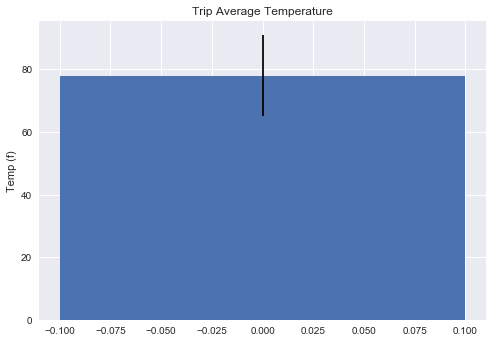

In [41]:
N = 1
tmin = 69
tmax = 82
tavg = 78
#yerr = tmax-tmin
ind = np.arange(N)    # the x locations for the groups
#width = len(x)      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,tavg, width = 0.20, yerr= 13)


plt.ylabel('Temp (f)')
plt.title('Trip Average Temperature')

plt.show()

In [42]:
session.query(measure.tobs, measure.date).\
    filter(measure.date >= '2016-01-01').\
    filter(measure.date <= '2017-01-01').all()

[(62, '2016-01-01'),
 (71, '2016-01-02'),
 (63, '2016-01-03'),
 (62, '2016-01-04'),
 (68, '2016-01-05'),
 (73, '2016-01-06'),
 (65, '2016-01-07'),
 (67, '2016-01-08'),
 (75, '2016-01-09'),
 (66, '2016-01-10'),
 (68, '2016-01-11'),
 (64, '2016-01-12'),
 (64, '2016-01-13'),
 (64, '2016-01-14'),
 (69, '2016-01-15'),
 (65, '2016-01-16'),
 (64, '2016-01-17'),
 (64, '2016-01-18'),
 (63, '2016-01-19'),
 (68, '2016-01-20'),
 (71, '2016-01-21'),
 (70, '2016-01-22'),
 (70, '2016-01-23'),
 (70, '2016-01-24'),
 (71, '2016-01-25'),
 (68, '2016-01-26'),
 (68, '2016-01-27'),
 (65, '2016-01-28'),
 (67, '2016-01-29'),
 (65, '2016-01-30'),
 (69, '2016-01-31'),
 (69, '2016-02-01'),
 (68, '2016-02-02'),
 (70, '2016-02-03'),
 (66, '2016-02-04'),
 (69, '2016-02-05'),
 (72, '2016-02-06'),
 (68, '2016-02-07'),
 (65, '2016-02-08'),
 (69, '2016-02-09'),
 (61, '2016-02-10'),
 (62, '2016-02-11'),
 (75, '2016-02-12'),
 (74, '2016-02-13'),
 (69, '2016-02-14'),
 (73, '2016-02-15'),
 (74, '2016-02-16'),
 (71, '2016-0

In [43]:
#Step 4 Climate APP